In [9]:
import logging
import random
import os

import networkx as nx
import osmnx as ox
from matplotlib import pyplot as plt
import yaml

import bcnetwork as bc

# Get graph from OSM

## Utils

In [10]:
plot_graph_params = dict(figsize=(20, 20), edge_color='#9e9e9e', node_color='#67ccfc', bgcolor='white')

## Load graph

In [18]:
file_cache = '../instances/treinta-y-tres/treinta_y_tres.yaml'
file_cache_dir = os.path.dirname(file_cache)

# Fix graph import from yaml
if os.path.isfile(file_cache):
    with open(file_cache, 'r') as file:
        g = yaml.load(file.read(), Loader=yaml.Loader)
else:
    g = bc.osm.as_serializable(
        bc.osm.normalize_osm(
            ox.graph_from_place('Treinta y Tres, Treinta y Tres, Uruguay')
        )
    )
    # Remove edges that make this graph a multigraph so it's supported by glpk
    duplicated_edges = [e for e in g.edges(keys=True) if e[2] > 0]
    g.remove_edges_from(duplicated_edges)
    if not os.path.isdir(file_cache_dir):
        os.mkdir(file_cache_dir)
    with open(file_cache, 'w') as file:
        file.write(yaml.dump(g))

Nodes: 1509
Edges: 4491
Multigraph: True
Directed: True


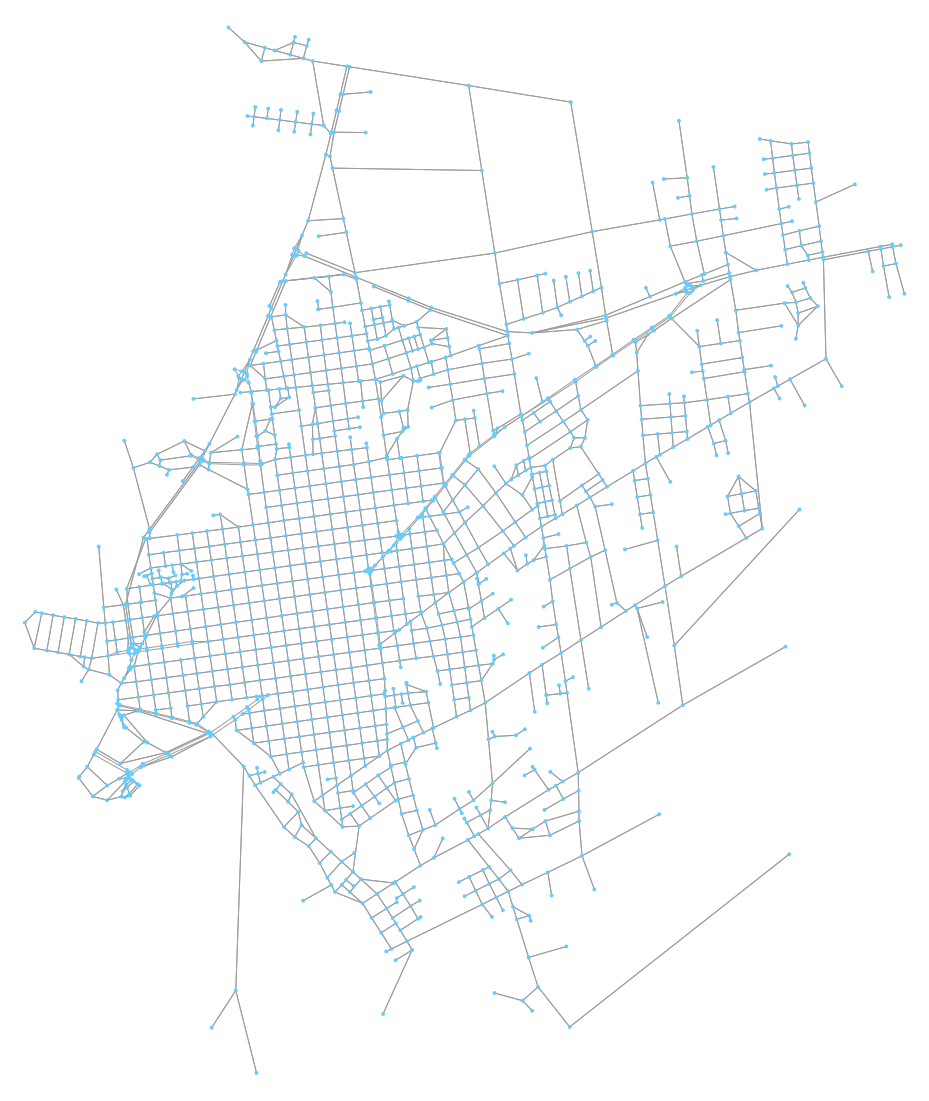

(<Figure size 1440x1440 with 1 Axes>, <AxesSubplot:>)

In [19]:
print(f'Nodes: {g.number_of_nodes()}')
print(f'Edges: {g.number_of_edges()}')
print(f'Multigraph: {g.is_multigraph()}')
print(f'Directed: {g.is_directed()}')

ox.plot_graph(g, **plot_graph_params)

In [22]:
e = list(g.edges())[0]

In [31]:
dict(g[e[0]])

{'2134400742': AtlasView({0: {'highway': 'trunk', 'lanes': '2', 'length': 182.306, 'name': 'Ruta 17', 'oneway': False, 'osmid': 241332041, 'ref': '17'}}),
 '2134400746': AtlasView({0: {'highway': 'residential', 'length': 20.208, 'name': '4 de Octubre', 'oneway': False, 'osmid': 240741266}}),
 '2776474684': AtlasView({0: {'highway': 'trunk', 'lanes': '2', 'length': 205.263, 'name': 'Ruta 17', 'oneway': False, 'osmid': 241332041, 'ref': '17'}}),
 '6481886243': AtlasView({0: {'highway': 'residential', 'length': 24.332, 'name': '4 de Octubre', 'oneway': False, 'osmid': 134830838}})}

## Draw result